## 개념

**(1) 다수항변수 생성**

**(2) 선형결합**

## scikit-learn의 PolynomialFeatures

In [1]:
import pandas as pd

cereal = pd.read_csv('../../dataset/cereal.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [2]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [3]:
cereal.columns[3:]

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [4]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
import matplotlib.pyplot as plt

cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.head()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-u7p4xmay because the default path (/config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/tmp/ipykernel_2104/520241378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


,sugars,rating
20,0,64.533816
54,0,60.756112
55,0,63.005645
3,0,93.704912
63,0,68.235885


In [6]:
cereal2.reset_index(drop=True, inplace=True)
cereal2.head()

,sugars,rating
0,0,64.533816
1,0,60.756112
2,0,63.005645
3,0,93.704912
4,0,68.235885


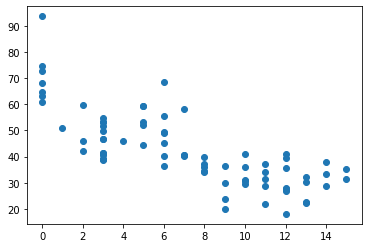

In [7]:
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x, y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(53,) (23,)
(53,) (23,)


In [9]:
X_train.reshape(-1, 1).shape

(53, 1)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, Y_train)

LinearRegression()

In [11]:
import numpy as np

X_test_poly = poly_reg.fit_transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2) #소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(-1, 1), Y_test.reshape(-1, 1)), 1))

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [12]:
pred.shape

(23,)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.fit_transform(X_test.reshape(-1, 1)), Y_test)
print(f"MSE: {round(mse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"ACC: {round(acc * 100, 3)}")

MSE: 33.565
MAE: 4.606
RMSE: 5.794
ACC: 74.376


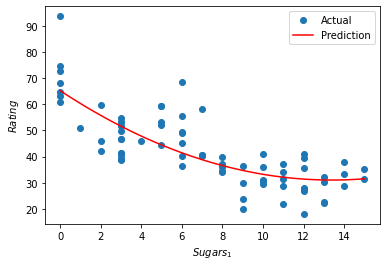

In [14]:
X_new = np.linspace(0, 15, 100).reshape(100, 1)
X_new_poly = poly_reg.fit_transform(X_new)
Y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, Y_new, 'r-', label="Prediction")
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

In [15]:
X = cereal.iloc[:, :-1].values
Y = cereal.iloc[:,-1].values

cereal.iloc[:, :-1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  76 non-null     int64  
 1   protein   76 non-null     int64  
 2   fat       76 non-null     int64  
 3   sodium    76 non-null     int64  
 4   fiber     76 non-null     float64
 5   carbo     76 non-null     float64
 6   sugars    76 non-null     int64  
 7   potass    76 non-null     int64  
 8   vitamins  76 non-null     int64  
 9   shelf     76 non-null     int64  
 10  weight    76 non-null     float64
 11  cups      76 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 7.7 KB


In [16]:
cereal.iloc[:,-1].info()

<class 'pandas.core.series.Series'>
Int64Index: 76 entries, 0 to 76
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
76 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, Y_train)

LinearRegression()

In [19]:
import numpy as np

X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(Y_test, pred)
mae = mean_absolute_error(Y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), Y_test)

print(f"MSE: {round(mse, 3)}")
print(f"MAE: {round(mae, 3)}")
print(f"RMSE: {round(rmse, 3)}")
print(f"ACC: {round(acc * 100, 3)}")

MSE: 9.81
MAE: 2.193
RMSE: 3.132
ACC: 92.476
